## K-means聚类--python实现代码

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import colors
from scipy import io as spio
from scipy import misc      # 图片操作
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    # 解决windows环境下画图汉字乱码问题
%matplotlib inline

### step1.找到每条数据距离哪个类中心最近  

In [2]:
def findClosestCentroids(X,initial_centroids):
    m = X.shape[0]                  # 数据条数
    K = initial_centroids.shape[0]  # 类的总数
    dis = np.zeros((m,K))           # 存储计算每个点分别到K个类的距离
    idx = np.zeros((m,1))           # 要返回的每条数据属于哪个类
    
    '''计算每个点到每个类中心的距离'''
    for i in range(m):
        for j in range(K):
            dis[i,j] = np.dot((X[i,:]-initial_centroids[j,:]).reshape(1,-1),(X[i,:]-initial_centroids[j,:]).reshape(-1,1))
    
    '''返回dis每一行的最小值对应的列号，即为对应的类别
    - np.min(dis, axis=1)返回每一行的最小值
    - np.where(dis == np.min(dis, axis=1).reshape(-1,1)) 返回对应最小值的坐标
     - 注意：可能最小值对应的坐标有多个，where都会找出来，所以返回时返回前m个需要的即可（因为对于多个最小值，属于哪个类别都可以）
    '''  
    dummy,idx = np.where(dis == np.min(dis, axis=1).reshape(-1,1))
    return idx[0:dis.shape[0]]  # 注意截取一下

### step2. 计算类中心

In [3]:
def computerCentroids(X,idx,K):
    n = X.shape[1]
    centroids = np.zeros((K,n))
    for i in range(K):
        centroids[i,:] = np.mean(X[np.ravel(idx==i),:], axis=0).reshape(1,-1)   # 索引要是一维的,axis=0为每一列，idx==i一次找出属于哪一类的，然后计算均值
    return centroids

### step3. 聚类算法

In [4]:
def runKMeans(X,initial_centroids,max_iters,plot_process):
    m,n = X.shape                   # 数据条数和维度
    K = initial_centroids.shape[0]  # 类数
    centroids = initial_centroids   # 记录当前类中心
    previous_centroids = centroids  # 记录上一次类中心
    idx = np.zeros((m,1))           # 每条数据属于哪个类
    
    for i in range(max_iters):      # 迭代次数
        print (u'迭代计算次数：%d'%(i+1))
        idx = findClosestCentroids(X, centroids)
        if plot_process:    # 如果绘制图像
            plt = plotProcessKMeans(X,centroids,previous_centroids) # 画聚类中心的移动过程
            previous_centroids = centroids  # 重置
        centroids = computerCentroids(X, idx, K)    # 重新计算类中心
    if plot_process:    # 显示最终的绘制结果
        plt.show()
    print (centroids)

### 聚类中心移动过程   

In [5]:
def plotProcessKMeans(X,centroids,previous_centroids):
    plt.scatter(X[:,0], X[:,1])     # 原数据的散点图
    plt.plot(previous_centroids[:,0],previous_centroids[:,1],'rx',markersize=10,linewidth=5.0)  # 上一次聚类中心
    plt.plot(centroids[:,0],centroids[:,1],'rx',markersize=10,linewidth=5.0)                    # 当前聚类中心
    for j in range(centroids.shape[0]):
        p1 = centroids[j,:]
        p2 = previous_centroids[j,:]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]],"->",linewidth=2.0)
    return plt

## 初始化类中心--随机取K个点作为聚类中心

In [6]:
def kMeansInitCentroids(X,K):
    m = X.shape[0]
    m_arr = np.arange(0,m)      # 生成0-m-1
    centroids = np.zeros((K,X.shape[1]))
    np.random.shuffle(m_arr)    # 打乱m_arr顺序    
    rand_indices = m_arr[:K]    # 取前K个
    centroids = X[rand_indices,:]
    return centroids

## 二维数据聚类过程演示

聚类过程展示...

迭代计算次数：1
迭代计算次数：2
迭代计算次数：3
迭代计算次数：4
迭代计算次数：5
迭代计算次数：6
迭代计算次数：7
迭代计算次数：8
迭代计算次数：9
迭代计算次数：10


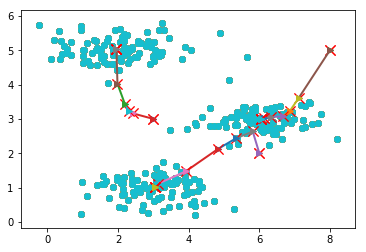

[[ 1.95399466  5.02557006]
 [ 3.04367119  1.01541041]
 [ 6.03366736  3.00052511]]


In [7]:
print (u'聚类过程展示...\n')
data = spio.loadmat("data.mat")
X = data['X']
K = 3   # 总类数
initial_centroids = np.array([[3,3],[6,2],[8,5]])   # 初始化类中心
max_iters = 10
runKMeans(X,initial_centroids,max_iters,True)       # 执行K-Means聚类算法